# Data Wrangling Project: WeRateDogs Twitter Archive

# I. Gathering Data

In [1]:
import numpy as np
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

1. Manually download the **twitter archive enchanced csv file** from Udacity

In [2]:
#Open and check  twitter archive file
twit_arch= pd.read_csv('twitter-archive-enhanced.csv')
twit_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Make the column wider to read the whole text
pd.set_option('display.max_colwidth', 1)

2. Query Twitter Data 

In [4]:
df_json = pd.read_json('tweet_json2.txt', orient = 'records', lines = True)

In [5]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2337 non-null datetime64[ns]
display_text_range               2337 non-null object
entities                         2337 non-null object
extended_entities                2063 non-null object
favorite_count                   2337 non-null int64
favorited                        2337 non-null bool
full_text                        2337 non-null object
geo                              0 non-null float64
id                               2337 non-null int64
id_str                           2337 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [6]:
# Create a dataframe
df_cleanjson = df_json[['id', 'favorite_count', 'retweet_count']]

3. Systemically download Image data file 

In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [8]:
df_image = pd.read_csv('image_predictions.tsv',sep = '\t')

In [9]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# II. Accessing Data

In [10]:
# 1. Twitter archive 
twit_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [11]:
twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
sum(twit_arch.expanded_urls.duplicated())

137

In [13]:
twit_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [14]:
twit_arch.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [15]:
twit_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [16]:
# Check the rating_numerator that higher than 15
twit_arch_overnumerator = twit_arch.query('rating_numerator >= 15') 
twit_arch_overnumerator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


In [17]:
twit_arch.expanded_urls.isnull().sum()

59

In [18]:
twit_arch.in_reply_to_status_id.notnull().sum()

78

In [19]:
# Check if they have any xx/xx more than one value
twit_arch[twit_arch.text.str.contains(r'\d+\/\d+\D+\d+\/\d+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",7.776842e+17,4.196984e+09,2016-09-19 01:42:24 +0000,"https://twitter.com/dog_rates/status/777684233540206592/photo/1,https://twitter.com/dog_rates/status/777684233540206592/photo/1",12,10,None,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268553605120/photo/1,8,10,Eve,None,None,pupper,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for 

- There are some data that contains more than one dog so the rating numerator and denominator are represent only the first one. It is difficult to clean for analyzing and it is not that much difference. Thus, I will not clean them.
- Data in index 1068,1165,1202,1459,1662,2335 : The first xx/xx pattern is invalid. It represent other things such as a date(dd/dd), the name of store(7/11), etc.

 # Quality
 
 - Timestamp should be changed from object datatype into datetime datatype
 - I will removed the row that in_reply_to_status_id != NaN because that row just retweet the old content
 - Due to text column, there are some rating_numerator should be float such as 75 should be 9.75 - The rating_numerator and rating_denominator of index 1068,1165,1202,1459,1662,2335 are invalids (i.e. date, 7/11etc.)
 - There are too various rating_denominator. I will create the score out of ten column by using rating_numerator divided by rating_denominator multiply ten 
 - Check incorrect score out of ten column (the new column) such as score out of ten <= 0
 - Removed duplicated expanded_urls data
 - Cleansing the data in source column to be more readable
 - There are some incorrect name such as 'a', 'an', 'the', etc.
 - Remove the column will not be used for analyzing : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, rating_numerator, rating_denominator 
 
# Tidiness
 - Merge all dog states (doggo, floofer, pupper, puppo) into one column

In [20]:
# 2. API Json Data
df_cleanjson.head()

,id,favorite_count,retweet_count
0,892420643555336193,37733,8222
1,892177421306343426,32416,6079
2,891815181378084864,24412,4023
3,891689557279858688,41063,8369
4,891327558926688256,39252,9082


In [21]:
df_cleanjson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
id                2337 non-null int64
favorite_count    2337 non-null int64
retweet_count     2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


# Quality
   - Rename id into tweet_id
    
# Tidiness
   - Merge df_arch_copy and df_cleanjson_copy

In [22]:
#  3. Image prediction data
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
sum(df_image.jpg_url.duplicated())

66

# Quality
   - Delete the duplicate jpg_url
   - Because I will use only p1 for analysis, I will remove unnecessary columns: img_num,p1_conf,p1_dog,p2, p2_conf, p2_dog, p3, p3_conf ,p3_dog
   - Make all dog breeds prediction of p1 into capitlize
   - Rename p1 column to predict_dogbreed 
   
# Tidiness
   - Merge combine and df_image_copy table

# III. Cleansing Data

### 1. Enhanced table

In [25]:
# Make a copy of dataframe
df_arch_copy = twit_arch.copy()

## Quality

**Define** 

Change datatype of Timestamp column from object into datetime

**Code**

In [26]:
df_arch_copy['timestamp'] =  pd.to_datetime(df_arch_copy['timestamp'])

**Test**

In [27]:
df_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

**Define**

Remove the row that in_reply_to_status_id and retweeted_status_id  is not null 

**Code**

In [28]:
df_arch_copy = df_arch_copy.query('in_reply_to_status_id == "NaN"')
df_arch_copy  = df_arch_copy.query('retweeted_status_id == "NaN"')

**Test**

In [29]:
df_arch_copy.in_reply_to_status_id.notnull().sum()

0

In [30]:
df_arch_copy.retweeted_status_id.notnull().sum()

0

**Define** 

Change datatype of rating_numerator column from int64 into float64

**Code**

In [31]:
df_arch_copy.rating_numerator = df_arch_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True).astype(float)

**Test**

In [32]:
df_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), flo

In [33]:
df_arch_copy.query('rating_numerator >= 15') 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60.0,50,a,None,None,None,No

Some over-numerator can divided by denominator and be the valid value, some of them still be overrating. 

However,  text from tweet_id = 810984652412424192 show that 24/7 it is a time. Thus, I will change it manually into 0  

**Define**

Change numerator and denominator of tweet_id = 810984652412424192 into NaN

**Code**

In [34]:
# df_enhanced_copy['decimal_score'][516] = 0
df_arch_copy.loc[df_arch_copy['tweet_id'] == 810984652412424192, ['rating_numerator']] = 0
df_arch_copy.loc[df_arch_copy['tweet_id'] == 810984652412424192, ['rating_denominator']] = 0

**Test**

In [35]:
df_arch_copy.query('tweet_id == 810984652412424192')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",0.0,0,Sam,None,None,None,None


**Define**

Extract the second xx/xx pattern to rating_numerator and rating_denominator of index 1068,1165,1202,1459,1662,2335

**Code**

In [36]:
for i in [1068,1165,1202,1459,1662,2335] :
    text  = df_arch_copy.at[i, 'text']
    num = re.findall(r'\d+\/\d+\D+(\d+)\/\d+', text)[0]
    denom = re.findall(r'\d+\/\d+\D+\d+\/(\d+)', text)[0]
    df_arch_copy.at[i, 'rating_numerator'] = float(num)
    df_arch_copy.at[i, 'rating_denominator'] = int(denom)

**Test**

In [37]:
df_arch_copy.loc[[1068,1165,1202,1459,1662,2335],['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.0,10
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10
1459,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",13.0,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10.0,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0,10


**Define**

There are too various rating_denominator. I will create the score out of ten column by using rating_numerator divided by rating_denominator multiply ten

**Code**

In [38]:
df_arch_copy['score'] = df_arch_copy.rating_numerator / df_arch_copy.rating_denominator *10

**Test**

In [39]:
df_arch_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,None,None,None,None,13.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,None,None,None,None,13.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,None,None,None,None,12.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,None,None,None,None,13.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,None,None,None,None,12.0


**Define**

Check the invalid score which are lower than zero

**Code**

In [40]:
df_arch_copy.query('score <= 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10,None,None,None,None,None,0.0


In [41]:
## It posts about the plagiarism which not will be used in my analyzing so I will drop this row.
df_arch_copy.drop([315],inplace = True)

**Test**

In [42]:
df_arch_copy.query('score <= 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score


**Define**

Removed duplicated expanded url

**Code**

In [43]:
dup_url = df_arch_copy[df_arch_copy.duplicated(['expanded_urls'], keep = False)]

In [44]:
dup_url

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,NaN,NaN,NaN,12.0,10,None,None,None,None,None,12.0
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14.0,10,None,None,None,None,None,14.0
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10.0,10,None,None,None,None,None,10.0
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10.0,10,None,None,None,pupper,None,10.0
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13.0,10,the,None,None,None,None,13.0


> Tweet id 791774931465953280 and 668587383441514497 are the same dog. They are rated in different scores and different years. Thus, I'll drop the recent one.

In [45]:
## Tweet id 791774931465953280 and 668587383441514497 are the same dog. They are just rated in different scores and different years. 
## Thus, I decide to drop the recent one.
df_arch_copy.drop([657],inplace = True)

In [46]:
#test
df_arch_copy.query('tweet_id == 791774931465953280')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score


**Define**

Cleansing the data in source column to be more readable

**Code**

In [47]:
df_arch_copy.source = df_arch_copy.source.str.replace(r'<[^>]*>', ' ')

**Test**

In [48]:
df_arch_copy.source.value_counts()

 Twitter for iPhone      1963
 Vine - Make a Scene     90  
 Twitter Web Client      31  
 TweetDeck               11  
Name: source, dtype: int64

**Define**

There are some incorrect name such as 'a', 'an', 'the', etc. I will use string patterns like named * , name is * , and Meet * . (The pattern This is* is already used to detect the name in this dataframe)

In [49]:
#  Check the name is* pattern
df_arch_copy[df_arch_copy.text.str.contains('name is')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09,Twitter for iPhone,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14.0,10,None,None,None,None,None,14.0
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27,Twitter for iPhone,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811541651456/photo/1,13.0,10,None,None,None,None,puppo,13.0
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13.0,10,my,None,None,None,None,13.0
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29,Twitter for iPhone,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682047327939461121/photo/1,10.0,10,None,None,None,None,None,10.0
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56,Twitter for iPhone,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210798047232/photo/1,9.0,10,None,None,None,None,None,9.0
2267,667524857454854144,NaN,NaN,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12.0,10,None,None,None,None,None,12.0
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02,Twitter for iPhone,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989038297088/photo/1,8.0,10,a,None,None,None,None,8.0
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57,Twitter for iPhone,This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327293083650/photo/1,10.0,10,Lugan,None,None,None,None,10.0


In [50]:
name_is = df_arch_copy[df_arch_copy.text.str.contains('name is ')]
for i in name_is.index:
    try:
        text =df_arch_copy.at[i, 'text']
        dog_name = re.findall(r'name\s+is\s+(\w+)', text)[0]
        df_arch_copy.at[i, 'name'] = dog_name 
    except  IndexError:
        continue

**Test**

In [51]:
df_arch_copy[df_arch_copy.text.str.contains('name is ')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09,Twitter for iPhone,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14.0,10,Howard,None,None,None,None,14.0
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27,Twitter for iPhone,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811541651456/photo/1,13.0,10,Zoey,None,None,None,puppo,13.0
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13.0,10,Zoey,None,None,None,None,13.0
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29,Twitter for iPhone,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682047327939461121/photo/1,10.0,10,Thea,None,None,None,None,10.0
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56,Twitter for iPhone,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210798047232/photo/1,9.0,10,Sabertooth,None,None,None,None,9.0
2267,667524857454854144,NaN,NaN,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12.0,10,Big,None,None,None,None,12.0
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02,Twitter for iPhone,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989038297088/photo/1,8.0,10,Daryl,None,None,None,None,8.0
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57,Twitter for iPhone,This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327293083650/photo/1,10.0,10,Rocky,None,None,None,None,10.0


In [52]:
#  tweet id 667524857454854144 : Change name into Big Jumpy Rat
df_arch_copy.loc[df_arch_copy['tweet_id'] == 667524857454854144, ['name']] = 'Big Jumpy Rat'
df_arch_copy.loc[df_arch_copy['tweet_id'] == 667524857454854144, ['name']]

,name
2267,Big Jumpy Rat


In [53]:
# The pattern This is* is already correct so I will rename it back to Lugan
df_arch_copy.loc[df_arch_copy['tweet_id'] == 666739327293083650, ['name']] = 'Lugan'
df_arch_copy.loc[df_arch_copy['tweet_id'] == 666739327293083650, ['name']]

,name
2313,Lugan


**Code**

In [54]:
#  Check the named* pattern
df_arch_copy[df_arch_copy.text.str.contains('named')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51,Twitter for iPhone,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10.0,10,a,None,None,None,None,10.0
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44,Twitter for iPhone,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10.0,10,a,None,None,None,None,10.0
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22,Twitter for iPhone,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11.0,10,a,None,None,None,None,11.0
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49,Twitter for iPhone,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9.0,10,a,None,None,None,None,9.0
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27,Twitter for iPhone,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9.0,10,a,None,None,None,None,9.0
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40,Twitter for iPhone,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9.0,10,a,None,None,None,None,9.0
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09,Twitter for iPhone,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9.0,10,a,None,None,None,None,9.0
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01,Twitter for iPhone,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10.0,10,a,None,None,None,None,10.0
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02,Twitter for iPhone,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10.0,10,a,None,None,None,None,10.0
2166,669363888236994561,NaN,NaN,2015-11-25 03:56:01,Twitter for iPhone,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669363888236994561/photo/1,10.0,10,None,None,None,None,None,10.0


In [55]:
named = df_arch_copy[df_arch_copy.text.str.contains('named')]
for i in named.index:
    try:
        text = df_arch_copy.at[i, 'text']
        dog_name = re.findall(r'named\s+(\w+)', text)[0]
        df_arch_copy.at[i, 'name'] = dog_name 
    except  IndexError:
        continue

**Test**

In [56]:
df_arch_copy[df_arch_copy.text.str.contains('named')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51,Twitter for iPhone,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10.0,10,Wylie,None,None,None,None,10.0
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44,Twitter for iPhone,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10.0,10,Kip,None,None,None,None,10.0
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22,Twitter for iPhone,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11.0,10,Jacob,None,None,None,None,11.0
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49,Twitter for iPhone,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9.0,10,Rufus,None,None,None,None,9.0
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27,Twitter for iPhone,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9.0,10,Spork,None,None,None,None,9.0
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40,Twitter for iPhone,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9.0,10,Cherokee,None,None,None,None,9.0
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09,Twitter for iPhone,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9.0,10,Hemry,None,None,None,None,9.0
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01,Twitter for iPhone,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10.0,10,Alphred,None,None,None,None,10.0
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02,Twitter for iPhone,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10.0,10,Alfredo,None,None,None,None,10.0
2166,669363888236994561,NaN,NaN,2015-11-25 03:56:01,Twitter for iPhone,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669363888236994561/photo/1,10.0,10,Zeus,None,None,None,None,10.0


**Code**

In [57]:
## Check  the lowercase name
lowercase_name =  df_arch_copy[df_arch_copy.name.apply(lambda x: x.islower())]
lowercase_name

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14.0,10,such,None,None,None,None,14.0
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16,Twitter for iPhone,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14.0,10,a,None,None,pupper,None,14.0
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12.0,10,quite,None,None,None,None,12.0
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12.0,10,quite,None,None,None,None,12.0
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57,Twitter Web Client,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10.0,10,not,None,None,None,None,10.0
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17,Twitter for iPhone,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14.0,10,one,None,None,None,None,14.0
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28,Twitter for iPhone,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11.0,10,incredibly,None,None,None,None,11.0
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31,Twitter for iPhone,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13.0,10,a,None,None,None,None,13.0
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12,Twitter for iPhone,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10.0,10,a,None,None,None,None,10.0
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18,Twitter for iPhone,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,NaN,NaN,NaN,https://twitter.com/dog_rates

In [58]:
# All text of lowercase name do not contain names so I will rename them to None
lowercase_name.loc[:, ['name']] = 'None'

C:\Users\saridat\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [59]:
lowercase_name

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14.0,10,None,None,None,None,None,14.0
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16,Twitter for iPhone,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14.0,10,None,None,None,pupper,None,14.0
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12.0,10,None,None,None,None,None,12.0
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12.0,10,None,None,None,None,None,12.0
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57,Twitter Web Client,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10.0,10,None,None,None,None,None,10.0
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17,Twitter for iPhone,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14.0,10,None,None,None,None,None,14.0
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28,Twitter for iPhone,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11.0,10,None,None,None,None,None,11.0
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31,Twitter for iPhone,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13.0,10,None,None,None,None,None,13.0
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12,Twitter for iPhone,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10.0,10,None,None,None,None,None,10.0
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18,Twitter for iPhone,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,NaN,NaN,NaN,https://twitter.com/dog_ra

In [60]:
df_arch_copy[df_arch_copy.name.apply(lambda x: x.islower())] = lowercase_name

**Test**

In [61]:
df_arch_copy[df_arch_copy.name.apply(lambda x: x.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score


**Define**

Remove unnecessary columns that won't be used for analyzing : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, rating_numerator, rating_denominator 

**Code**

In [62]:
df_arch_copy.drop( columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','rating_numerator','rating_denominator'], inplace = True)

**Test**

In [63]:
df_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         2095 non-null int64
timestamp        2095 non-null datetime64[ns]
source           2095 non-null object
text             2095 non-null object
expanded_urls    2092 non-null object
name             2095 non-null object
doggo            2095 non-null object
floofer          2095 non-null object
pupper           2095 non-null object
puppo            2095 non-null object
score            2094 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 276.4+ KB


## Tidiness

**Define**

Merge all dog states (doggo, floofer, pupper, puppo) into one column

**Code**

In [64]:
df_arch_copy['dog_state'] = df_arch_copy['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [65]:
#Drop doggo, floofer, pupper, puppo columns
df_arch_copy.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

**Test**

In [66]:
df_arch_copy.dog_state.value_counts()

pupper     240
doggo      80 
puppo      29 
floofer    4  
Name: dog_state, dtype: int64

In [67]:
df_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2095 non-null int64
timestamp        2095 non-null datetime64[ns]
source           2095 non-null object
text             2095 non-null object
expanded_urls    2092 non-null object
name             2095 non-null object
score            2094 non-null float64
dog_state        353 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 227.3+ KB


# 2. API Json Data

# Quality

In [68]:
# Make a copy of dataframe
df_cleanjson_copy =  df_cleanjson.copy()

**Define**

Change the column name id into tweet_id

**Code**

In [69]:
df_cleanjson_copy.rename(index = str, columns = {'id': 'tweet_id'}, inplace =  True)

**Test**

In [70]:
df_cleanjson_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null int64
favorite_count    2337 non-null int64
retweet_count     2337 non-null int64
dtypes: int64(3)
memory usage: 73.0+ KB


## Tidiness

**Defiine**

Merge df_arch_copy and df_cleanjson_copy

**Code**

In [71]:
combine = pd.merge(df_arch_copy, df_cleanjson_copy, on ='tweet_id', how = 'left')

**Test**

In [72]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2094
Data columns (total 10 columns):
tweet_id          2095 non-null int64
timestamp         2095 non-null datetime64[ns]
source            2095 non-null object
text              2095 non-null object
expanded_urls     2092 non-null object
name              2095 non-null object
score             2094 non-null float64
dog_state         353 non-null object
favorite_count    2090 non-null float64
retweet_count     2090 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 180.0+ KB


# 3. Image prediction data 

In [73]:
df_image_copy = df_image.copy()

## Quality

**Define**

Delete the duplicate jpg_url

**Code**

In [74]:
df_image_copy["is_duplicate"]= df_image_copy.jpg_url.duplicated()

In [75]:
df_image_copy.query('is_duplicate == False',inplace = True)

**Test**

In [76]:
df_image_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_duplicate
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,False
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,False
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,False
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,False
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,False


**Define**

Remove unnecessary columns that won't be used in analyze

**Code**

In [77]:
df_image_copy.drop( columns = ['img_num', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'is_duplicate'], inplace = True)

**Test**

In [78]:
df_image_copy.head()

,tweet_id,jpg_url,p1
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


**Define**

Make all dog breeds prediction of p1 into capitlize

**Code**

In [79]:
df_image_copy.p1 = df_image_copy.p1.str.capitalize()

**Test**

In [80]:
sum(df_image_copy.p1.str.islower())

0

**Define**

Rename p1 column to predict_dogbreed

**Code**

In [81]:
df_image_copy.rename(index = str, columns = {'p1': 'predict_dogbreed'}, inplace =  True)

**Test**

In [82]:
df_image_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id            2009 non-null int64
jpg_url             2009 non-null object
predict_dogbreed    2009 non-null object
dtypes: int64(1), object(2)
memory usage: 62.8+ KB


## Tidiness

**Define**

Merge combine and df_image_copy table

**Code**

In [83]:
full_combine = pd.merge(combine, df_image_copy, on ='tweet_id', how = 'left')

**Test**

In [84]:
full_combine

,tweet_id,timestamp,source,text,expanded_urls,name,score,dog_state,favorite_count,retweet_count,jpg_url,predict_dogbreed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0,NaN,37733.0,8222.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0,NaN,32416.0,6079.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0,NaN,24412.0,4023.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0,NaN,41063.0,8369.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0,NaN,39252.0,9082.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,13.0,NaN,19740.0,3008.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,13.0,NaN,11542.0,1991.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",None,13.0,NaN,63659.0,18276.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,13.0,NaN,27117.0,4137.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,Cassie,14.0,doggo,31113.0,7144.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke


In [85]:
full_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2094
Data columns (total 12 columns):
tweet_id            2095 non-null int64
timestamp           2095 non-null datetime64[ns]
source              2095 non-null object
text                2095 non-null object
expanded_urls       2092 non-null object
name                2095 non-null object
score               2094 non-null float64
dog_state           353 non-null object
favorite_count      2090 non-null float64
retweet_count       2090 non-null float64
jpg_url             1970 non-null object
predict_dogbreed    1970 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 212.8+ KB


# IV. Storing Data

In [86]:
full_combine.to_csv('twitter_archive_master.csv', index = False)

# V.  Analyzing and Visualizing Data 

In [87]:
# Open the twitter_archive_master.csv file
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,score,dog_state,favorite_count,retweet_count,jpg_url,predict_dogbreed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0,NaN,37733.0,8222.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0,NaN,32416.0,6079.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0,NaN,24412.0,4023.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0,NaN,41063.0,8369.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0,NaN,39252.0,9082.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 12 columns):
tweet_id            2095 non-null int64
timestamp           2095 non-null object
source              2095 non-null object
text                2095 non-null object
expanded_urls       2092 non-null object
name                2095 non-null object
score               2094 non-null float64
dog_state           353 non-null object
favorite_count      2090 non-null float64
retweet_count       2090 non-null float64
jpg_url             1970 non-null object
predict_dogbreed    1970 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 196.5+ KB


In [89]:
df.describe()

,tweet_id,score,favorite_count,retweet_count
count,2.095000e+03,2094.000000,2090.000000,2090.000000
mean,7.364860e+17,11.661309,8704.452632,2685.223445
std,6.708835e+16,39.655451,12622.816443,4687.313584
min,6.660209e+17,1.000000,77.000000,11.000000
25%,6.768157e+17,10.000000,1935.000000,595.250000
50%,7.095662e+17,11.000000,3969.500000,1305.000000
75%,7.873602e+17,12.000000,10854.500000,3055.750000
max,8.924206e+17,1776.000000,162867.000000,82881.000000


**Insights**

   - The mean and median value of score are 11.66 and 11.00 respectively.
   - The mean and median value of favorite_count are 8704.45 and 3969.50 respectively.
   - The mean and median value of retweet_count are 2685.22 and 1305.00 respectively.

In [90]:
df.dog_state.value_counts()

pupper     240
doggo      80 
puppo      29 
floofer    4  
Name: dog_state, dtype: int64

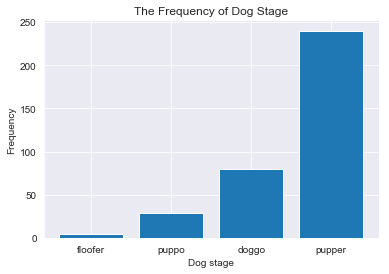

In [91]:
sns.set_style('darkgrid')
locations = [1, 2, 3, 4]
heights = [4, 29, 80, 240]
labels = ['floofer', 'puppo', 'doggo', 'pupper']
plt.bar(locations, heights, tick_label = labels)
plt.title('The Frequency of Dog Stage')
plt.xlabel('Dog stage')
plt.ylabel('Frequency');

In [92]:
dog_breed = df.groupby(['predict_dogbreed'])['favorite_count'].sum()
top10_fav = dog_breed.nlargest(10)

In [93]:
top10_fav

predict_dogbreed
Golden_retriever      1640109.0
Labrador_retriever    1063957.0
Pembroke              966494.0 
Chihuahua             667954.0 
Samoyed               499620.0 
French_bulldog        454573.0 
Chow                  395366.0 
Pug                   304275.0 
Cocker_spaniel        300199.0 
Pomeranian            294475.0 
Name: favorite_count, dtype: float64

In [97]:
top10_fav = top10_fav/1000000

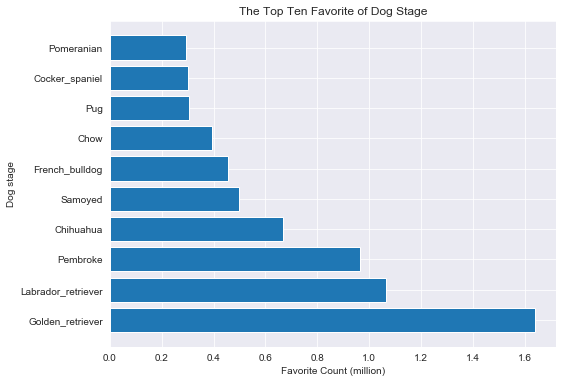

In [98]:
plt.figure(figsize=(8,6))
plt.barh(top10_fav.index, top10_fav)
plt.title('The Top Ten Favorite of Dog Stage')
plt.xlabel('Favorite Count (million)')
plt.ylabel('Dog stage');

In [99]:
retweet_dogbreed = df.groupby(['predict_dogbreed'])['retweet_count'].sum()
top10_retweet = retweet_dogbreed.nlargest(10)
top10_retweet

predict_dogbreed
Golden_retriever      474585.0
Labrador_retriever    341731.0
Pembroke              264321.0
Chihuahua             212827.0
Samoyed               164493.0
French_bulldog        114066.0
Chow                  111301.0
Pomeranian            101752.0
Cocker_spaniel        93986.0 
Eskimo_dog            92413.0 
Name: retweet_count, dtype: float64

In [100]:
top10_retweet = top10_retweet/100000

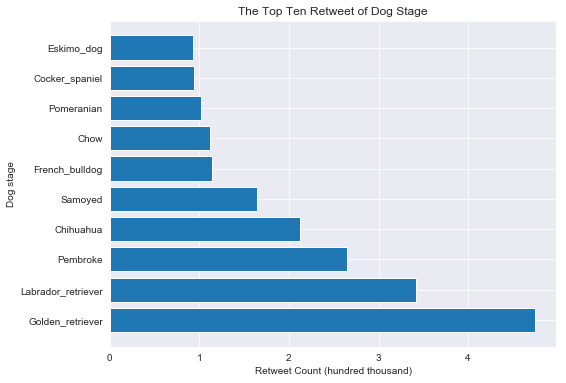

In [101]:
plt.figure(figsize=(8,6))
plt.barh(top10_retweet.index, top10_retweet)
plt.title('The Top Ten Retweet of Dog Stage')
plt.xlabel('Retweet Count (hundred thousand)')
plt.ylabel('Dog stage');

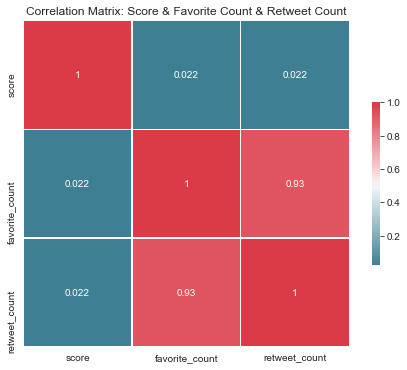

In [102]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df[['score', 'favorite_count', 'retweet_count']].corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix: Score & Favorite Count & Retweet Count');

  - There are strong correlation between favorite_count and retweet_count (Correlation = 0.93)
  - This strong relationship also support our previous analyze that dog breed highest favorite count and retweet count are almost the same breed

In [103]:
df['timestamp'] =  pd.to_datetime(df['timestamp'])

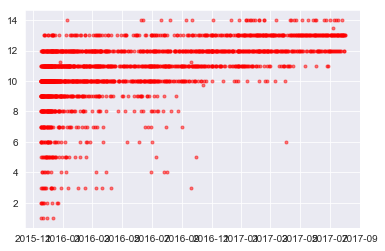

In [104]:
corr_time =  df.query('score <= 15')
time = corr_time.timestamp
score = corr_time.score
fig, ax = plt.subplots()
ax.plot_date(time, score, alpha = 0.5, ms = 3, c = 'red');

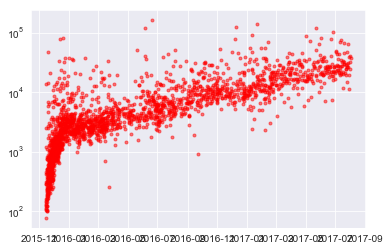

In [105]:
time = corr_time.timestamp
fav = corr_time.favorite_count
fig, ax = plt.subplots()
ax.plot_date(time, fav, alpha = 0.5, ms = 3, c = 'red')
ax.set_yscale('log');